The Tanzanian tourism industry plays a crucial role in the country's economy, contributing approximately 17% to the GDP and constituting 25% of foreign exchange revenues. This sector directly employs over 600,000 individuals and indirectly supports up to 2 million people. Government data from 2018 indicates that the tourism sector generated around $2.4 billion. In 2014, Tanzania welcomed a record 1.1 million international visitors, primarily from Europe, the United States, and Africa.

Tanzania stands out as the only country globally that has designated more than 25% of its total land area for wildlife, national parks, and protected areas. The country boasts 16 national parks, 28 game reserves, 44 game-controlled areas, two marine parks, and one conservation area.

The diverse attractions in Tanzania encompass the Serengeti plains, renowned for hosting the world's largest terrestrial mammal migration; the Ngorongoro Crater, the largest intact volcanic caldera globally, housing the highest density of big game in Africa; Kilimanjaro, the continent's tallest mountain; and the Mafia Island marine park, among others. The picturesque landscapes, varied topography, vibrant culture, and hospitable people make Tanzania an ideal destination for cultural tourism, beach holidays, honeymoons, game hunting, historical and archaeological explorations, and undoubtedly, the finest wildlife photography safaris worldwide.

Knowing the value of tourism in Tanzania's economy. Tour operators would like to have a model that would predict what a tourist would spend on their tour to Tanzania. The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania.


My first step is to import the libraries. Since the main aim of the model is to predict what a tourist will spend while his stay in Tanzania, I will pick regression libraries in sci-kit learn to help me in analysis and prediction.

In [ ]:
# importlibraries
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

I then import the train and test datasets and inspect them

In [ ]:
# import the train and test datasets
train=pd.read_csv("/content/Train.csv")
test=pd.read_csv("/content/Test.csv")

In [ ]:
print(train.shape)
print(test.shape)

(4809, 23)
(1601, 22)


In [ ]:
# look for null data
# check for missing values
(train.isna().sum()/len(train))*100

ID                        0.000000
country                   0.000000
age_group                 0.000000
travel_with              23.164899
total_female              0.062383
total_male                0.103972
purpose                   0.000000
main_activity             0.000000
info_source               0.000000
tour_arrangement          0.000000
package_transport_int     0.000000
package_accomodation      0.000000
package_food              0.000000
package_transport_tz      0.000000
package_sightseeing       0.000000
package_guided_tour       0.000000
package_insurance         0.000000
night_mainland            0.000000
night_zanzibar            0.000000
payment_mode              0.000000
first_trip_tz             0.000000
most_impressing           6.508630
total_cost                0.000000
dtype: float64

It is important to check if there is missing data in your dataset. Missing data can affect how your model works. So working on them is very important in the preprocessing stage.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [ ]:
train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


By checking the statistics, it seems that the data has so many outliers. Outliers may impact the model performance and may make it hard to give accurate information while using the model and reduce the confidence in our model.

Total cost seems to have outliers. let me visualize using a box plot and histogram to check the extent of the outliers.

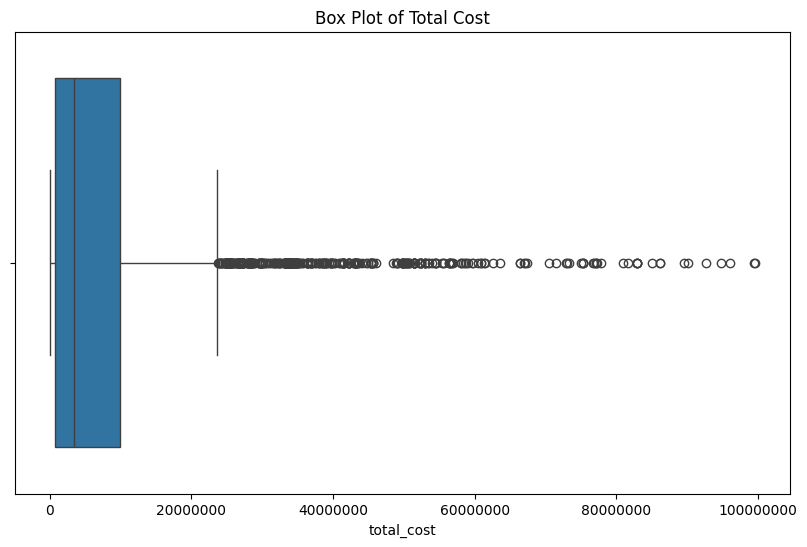

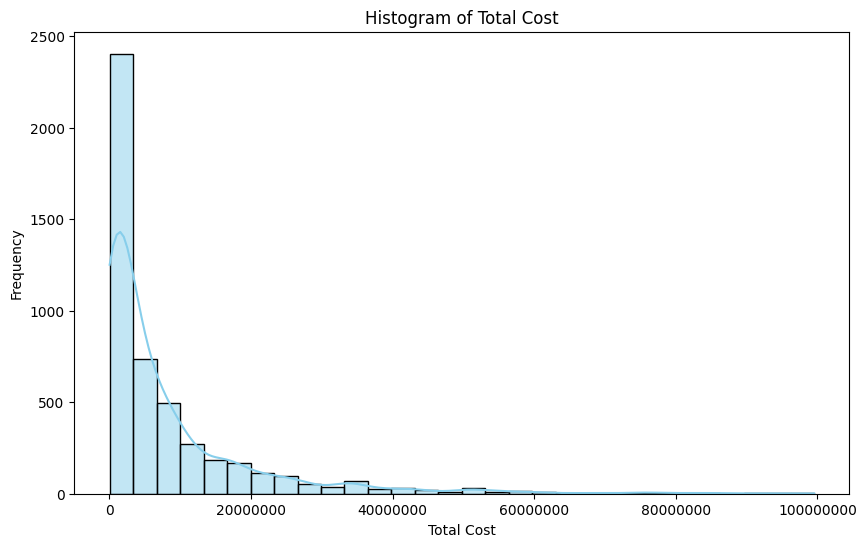

In [ ]:
# The total cost/the target column also contains outliers


total_cost = train['total_cost']

# Plotting a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=total_cost)
plt.title('Box Plot of Total Cost')


plt.ticklabel_format(style='plain', axis='x')

plt.show()

# Plotting a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(total_cost, bins=30, kde=True, color='skyblue')
plt.title('Histogram of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()


# Thre seems to be outliers in the target column. It will be great If we removed them since it distorts the

Now that I am sure that there are outliers in the target column, Let me use the quantile method. It will help me to know the minimum and the maximum amount of money tourists spend while on their trip in Tanzania.

In [ ]:
train["total_cost"].quantile([0,1])

0.0       49000.0
1.0    99532875.0
Name: total_cost, dtype: float64

using the quantile results and the oulier graphs we can estimate the probably best minmimum and maximum amount we can use to train our model.

In [9]:
total_cost= train[train["total_cost"].between(100000, 12500000)]

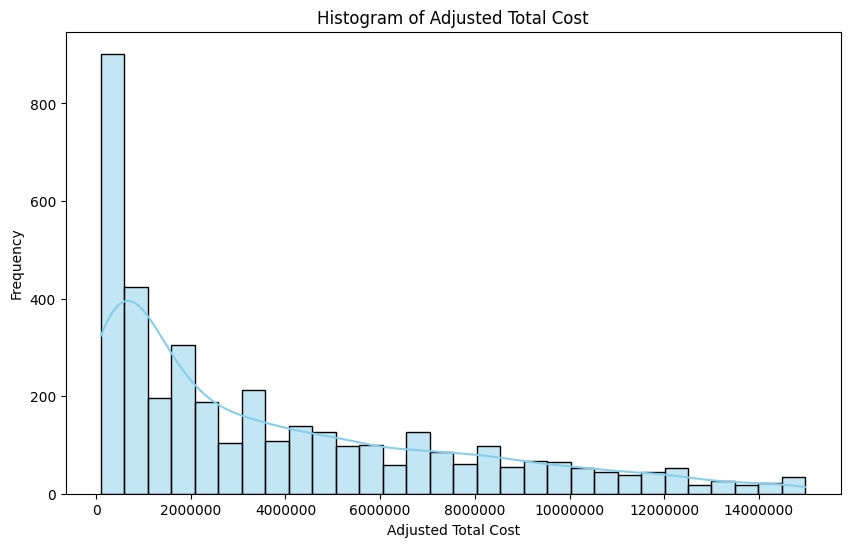

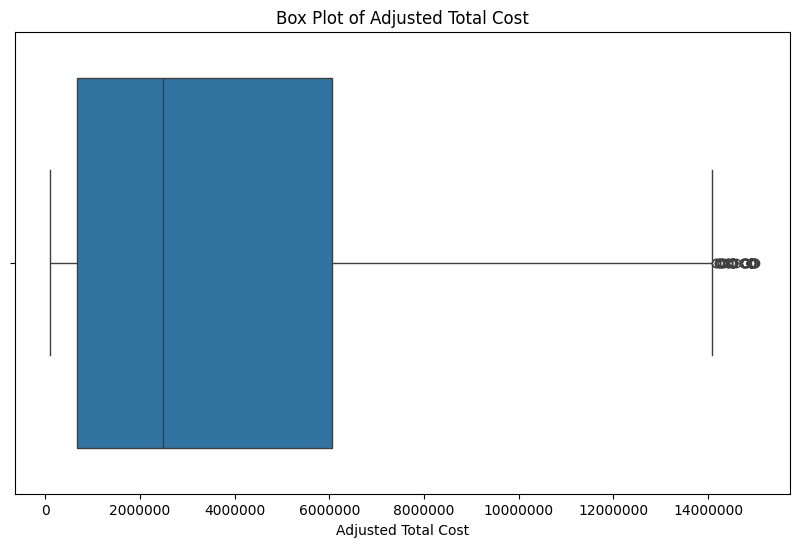

In [25]:


filtered_data = train[train["total_cost"].between(100000, 15000000)]
adjusted_total_cost = filtered_data["total_cost"]

# Plotting a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(adjusted_total_cost, bins=30, kde=True, color='skyblue')
plt.title('Histogram of Adjusted Total Cost')
plt.xlabel('Adjusted Total Cost')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()




filtered_data = train[train["total_cost"].between(100000,15000000)]
adjusted_total_cost = filtered_data["total_cost"]

# Plotting a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=adjusted_total_cost)
plt.title('Box Plot of Adjusted Total Cost')
plt.xlabel('Adjusted Total Cost')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


## perform exploratory data analysis

Exploratory data analysis helps us to have an insight on how tourists spend their money, which age group visted the country most and what places were most frequented by the tourists.

1. whats the main activity done by most of the people while in Tanzania

In [13]:

main_activity=train.main_activity.value_counts()
main_activity

Wildlife tourism            2259
Beach tourism               1025
Hunting tourism              457
Conference tourism           367
Cultural tourism             359
Mountain climbing            234
business                      58
Bird watching                 37
Diving and Sport Fishing      13
Name: main_activity, dtype: int64

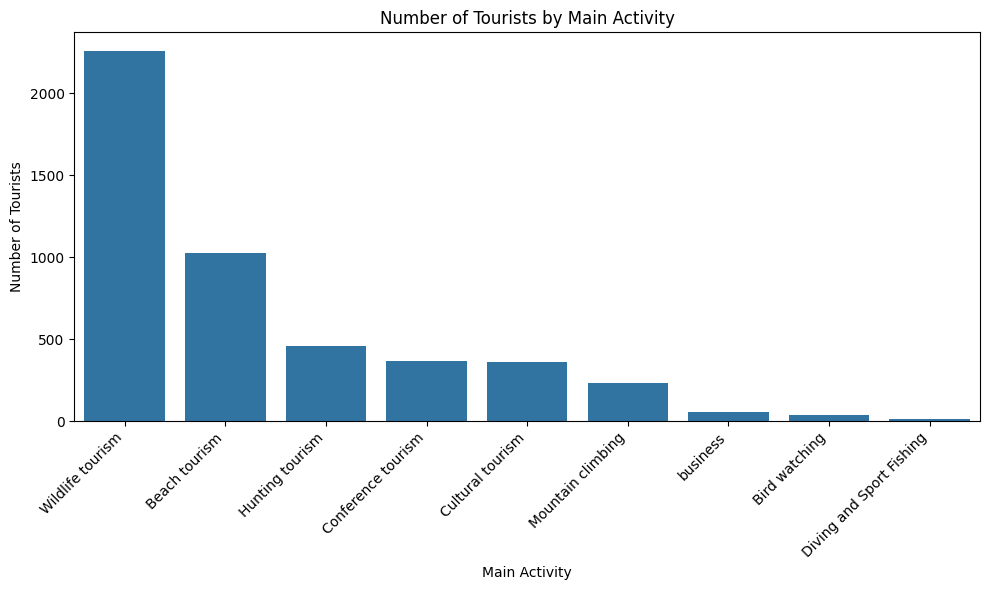

In [12]:
main_activity = train.main_activity.value_counts().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=main_activity, x='index', y='main_activity')
plt.xlabel("Main Activity")
plt.ylabel("Number of Tourists")
plt.title("Number of Tourists by Main Activity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### We will check how different age group relates with different variables

In [ ]:
# convert the 1 to 24 into 18 to 24

In [11]:
train['age_group']=train['age_group'].str.replace("1-24","18-24")

2.  How does age group relate with the main activities

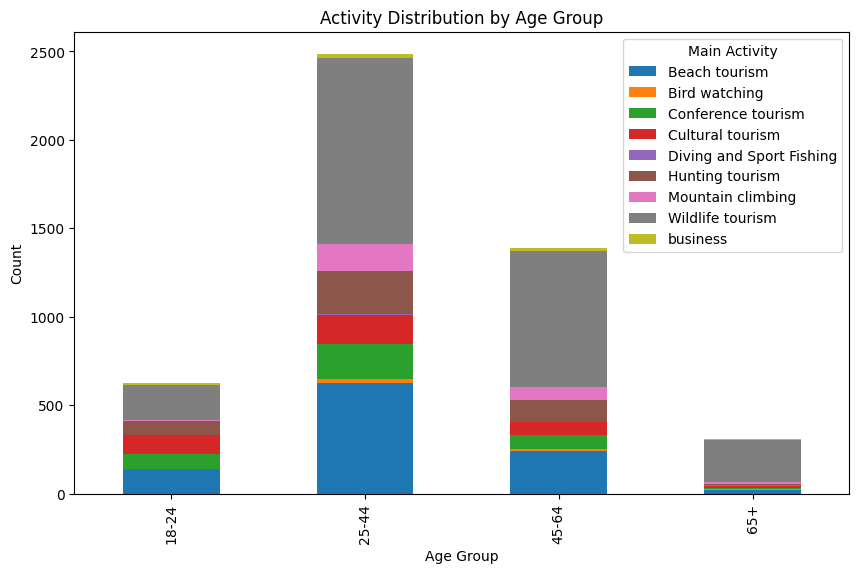

In [14]:
# Age group vs main tourist activity

age_group_activity=train.groupby(["age_group","main_activity"])["main_activity"].count()
age_group_activity
age_group_activity = age_group_activity.unstack(level=1)

# Plotting
age_group_activity.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Activity Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Main Activity', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()




3.  age group vs purpose of meeting

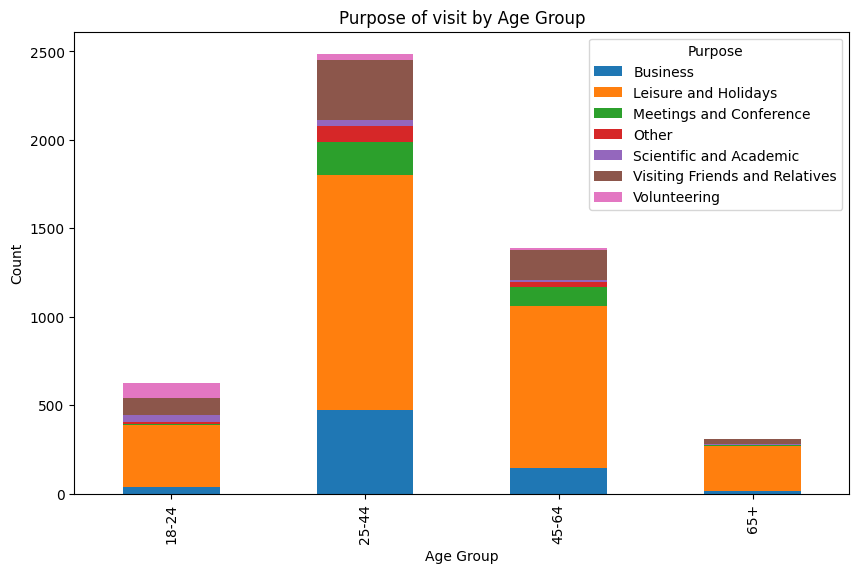

In [15]:

age_group_purpose=train.groupby(["age_group","purpose"])["main_activity"].count()
age_group_purpose
age_group_purpose = age_group_purpose.unstack(level=1)

# Plotting
age_group_purpose.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Purpose of visit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Purpose', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()



## 4.  Age group vs  Different travel packages

 Age group vs transport package international

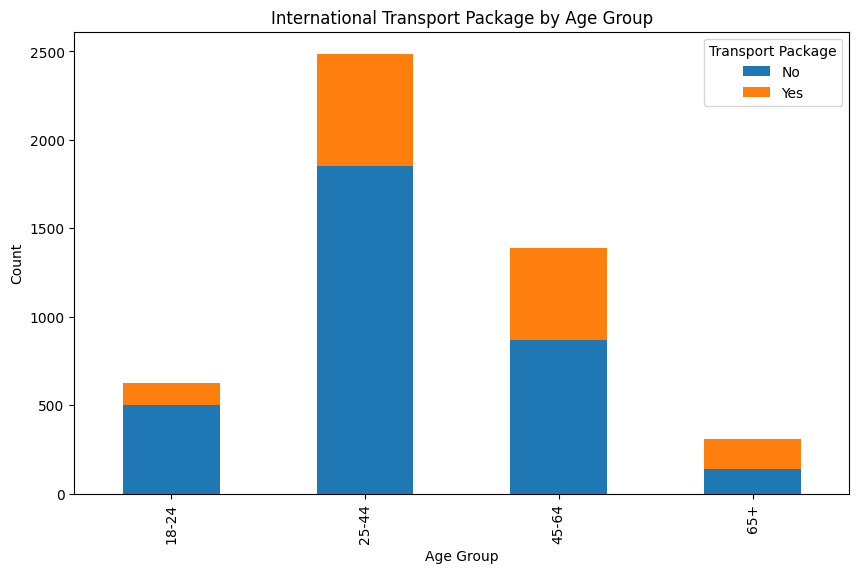

In [16]:

age_group_transportpckgint=train.groupby(["age_group","package_transport_int"])["package_transport_int"].count()
age_group_transportpckgint
# Plot a bar chart
age_group_transportpckgint = age_group_transportpckgint.unstack(level=1)

# Plotting
age_group_transportpckgint.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('International Transport Package by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Transport Package', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## It is evident that in all of the age groups, most of them do not prefer international transport package

 Age group vs transport package accomodation

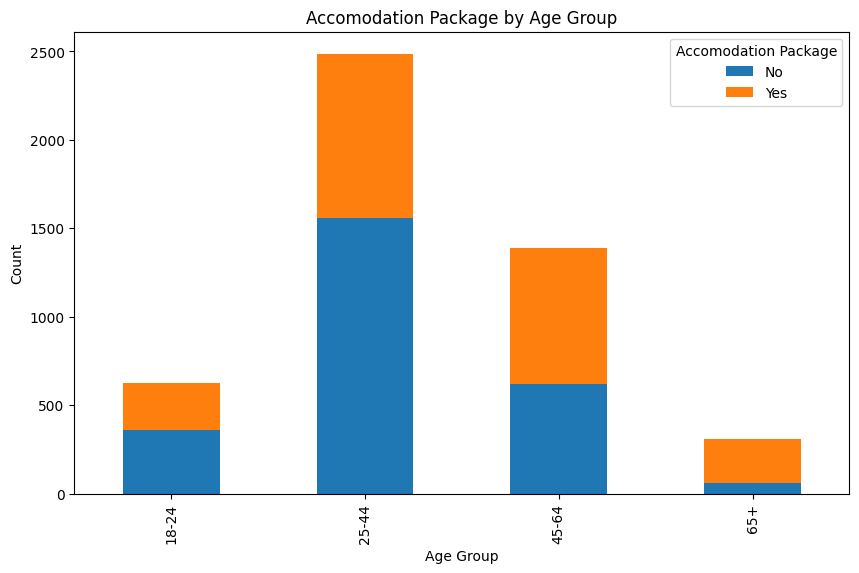

In [17]:

age_group_accomodationpckg=train.groupby(["age_group","package_accomodation"])["package_accomodation"].count()
age_group_accomodationpckg
# Plot a bar chart
age_group_accomodationpckg = age_group_accomodationpckg.unstack(level=1)

# Plotting
age_group_accomodationpckg.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accomodation Package by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Accomodation Package', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## 45 years old and above prefer accomodation packages

 Age group vs  package food

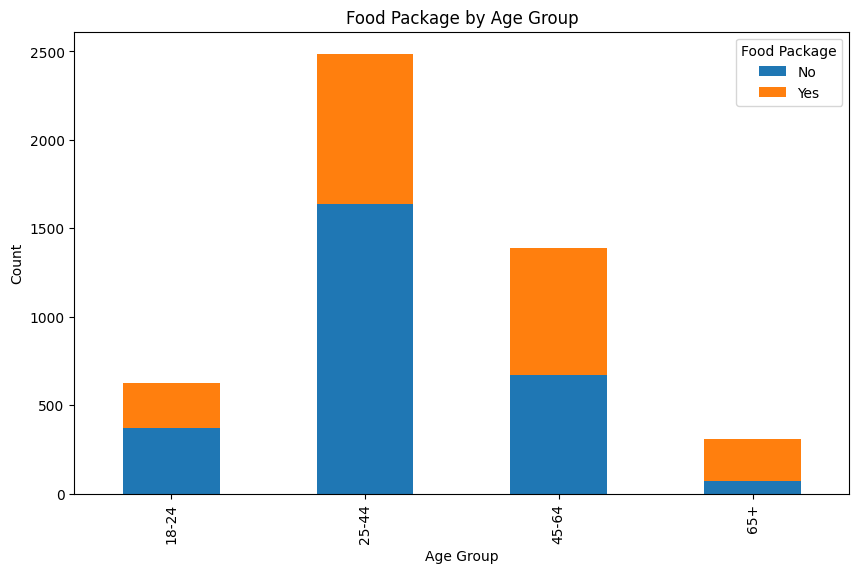

In [18]:

age_group_foodpckg=train.groupby(["age_group","package_food"])["package_food"].count()
age_group_foodpckg
# Plot a bar chart
age_group_foodpckg = age_group_foodpckg.unstack(level=1)

# Plotting
age_group_foodpckg.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Food Package by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Food Package', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## 45 years old and above prefer food packages

 Age group vs transport package transport tz

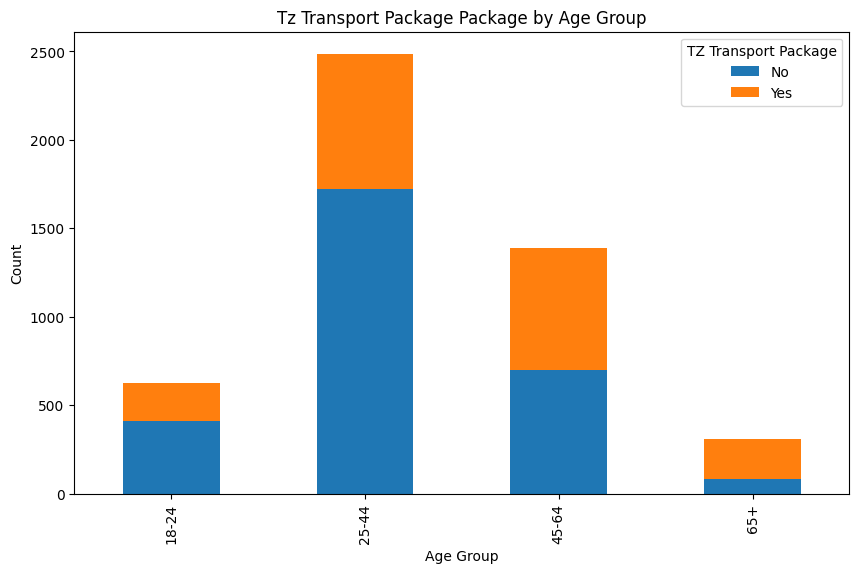

In [19]:

age_group_transtzpckg=train.groupby(["age_group","package_transport_tz"])["package_transport_tz"].count()
age_group_transtzpckg
# Plot a bar chart
age_group_transtzpckg = age_group_transtzpckg.unstack(level=1)

# Plotting
age_group_transtzpckg.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tz Transport Package Package by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='TZ Transport Package', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## 65 years old and above prefer tanzanian transport packages

 Age group vs transport package sightseeing

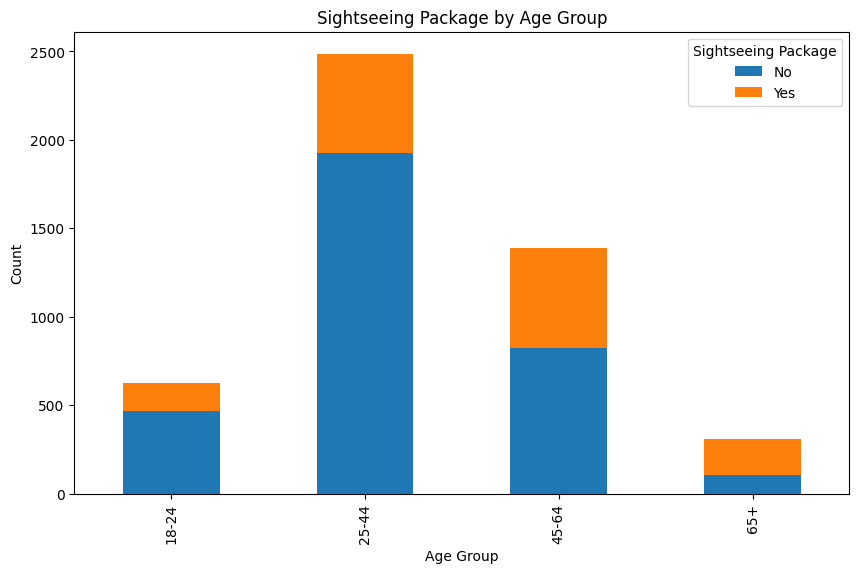

In [20]:

age_group_sseeingpckg=train.groupby(["age_group","package_sightseeing"])["package_sightseeing"].count()
age_group_sseeingpckg
# Plot a bar chart
age_group_sseeingpckg = age_group_sseeingpckg.unstack(level=1)

# Plotting
age_group_sseeingpckg.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sightseeing Package by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sightseeing Package', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## 65 years old and above prefer sight seeing packages

Age group vs guided tour package

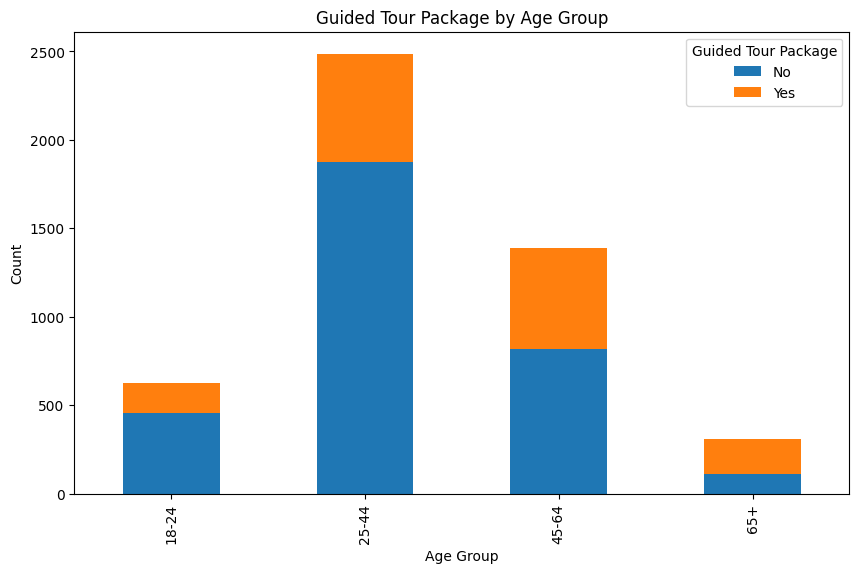

In [21]:


age_group_guidedtour=train.groupby(["age_group","package_guided_tour"])["package_guided_tour"].count()
age_group_guidedtour

age_group_guidedtour = age_group_guidedtour.unstack(level=1)

# Plotting
age_group_guidedtour.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Guided Tour Package by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Guided Tour Package', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# 65 year old and above prefer guided tour

Age group vs insurance package

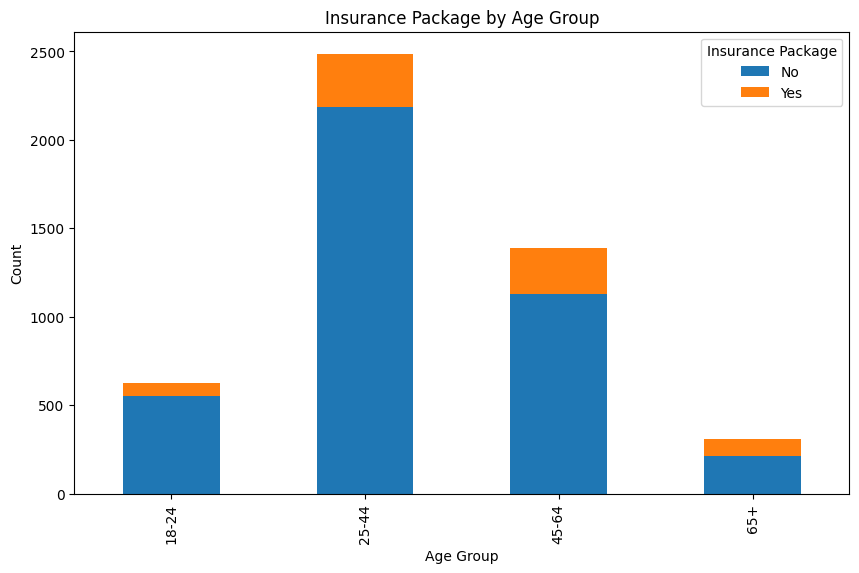

In [23]:


age_group_insurancepckg=train.groupby(["age_group","package_insurance"])["package_insurance"].count()
age_group_insurancepckg

age_group_insurancepckg = age_group_insurancepckg.unstack(level=1)

# Plotting
age_group_insurancepckg.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Insurance Package by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Insurance Package', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# Most visitors in all age group do not prefer insurance package

Zanzibar vs mainland stay

In [24]:

zanzibar_night=train["night_zanzibar"].sum()
mainland_night=train["night_mainland"].sum()



zanzibar_night = 11082.0
mainland_night = 40819.0

# Create a table
data = {'Location': ['Zanzibar', 'Mainland'],
        'Total Nights': [zanzibar_night, mainland_night]}

table = tabulate(data, headers='keys',tablefmt='plain')

# Display the table
print(table)

# Tourists spent more time on Mainland Tanzania compared to Tanzania


Location      Total Nights
Zanzibar             11082
Mainland             40819


## Insights from Visitor Demographics and Preferences in Tanzania

**Age Group Preferences:**

Visitors aged 25-44: Primarily attracted for business, leisure, and holidays.\
Visitors aged 45-64: More prominent in holiday-making and visiting friends and relatives.\
Visitors aged 18-24: Mainly came for leisure, holidays, and volunteering.\
Senior citizens (65 and above): Prefer leisure, holidays, and visiting friends and relatives.

**Main Activity Across All Age Groups:**

Wildlife tourism emerged as the main activity for visitors of all age groups.
Purpose of Visit\
Across all age groups, the main purpose of the visit to Tanzania was leisure and holidays.

**Travel Packages Preferences:**

No international travel package was preferred over an international one across all age groups.\
Visitors aged 45 and above showed a preference for accommodation packages.\
Food in the package was preferred, particularly by those aged 45 and above.\
Local travel Tanzania transport packages were favored by individuals aged 65 and above.\
Sightseeing was not a popular inclusion in travel packages.\
Those aged 65 and above who preferred guided tours.

**Insurance Coverage:**

Across all age groups, the majority of visitors did not opt for an insurance package.

**Duration of Stay:**

Visitors tended to stay longer in Mainland Tanzania compared to Zanzibar.




## PREDICTION AND MACHINE LERANING

I first write a wrangle function that will filter the train and test data.

In [26]:
def wrangle(data, target_column=None):
    # Drop the ID column
    data = data.drop(["ID"], axis=1)

    # replace 1-24 yrs to 18 to 24 yrs
    data["age_group"] = data["age_group"].str.replace("1-24", "18-24")

    # Drop the other specified columns
    columns_to_drop = ["most_impressing", "payment_mode", "first_trip_tz",
                       "info_source", "country", "travel_with", "purpose",
                       "age_group", "total_male", "total_female"]
    data = data.drop(columns=columns_to_drop, axis=1)

    # # Remove outliers based on night_mainland and night_zanzibar
    # # Filter data based on desired minimum and maximum nights
    # data = data[data["night_zanzibar"].between(0, 10)]  # Filter for nights in Zanzibar
    # data = data[data["night_mainland"].between(0, 16)]  # Filter for nights in mainland

    # Filter target column for training data only
    if target_column is not None and "total_cost" in data.columns:
        data = data[data["total_cost"].between(100000, 15000000)]

    # Drop nulls
    data.dropna(axis=0, inplace=True)

    # Separate features and target
    if target_column is not None:
        X = data.drop(target_column, axis=1)
        y = data[target_column]

        # Separate numeric features from categorical features in features
        numeric_features = X.select_dtypes("number").columns
        categorical_features = X.select_dtypes("object").columns

        # Pipeline for numeric feature transformation (MinMax Scaling)
        numeric_transformer = Pipeline(
            steps=[("scaler", MinMaxScaler(feature_range=(0, 1)))]
        )

        categorical_transformer = Pipeline(
            steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
        )

        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer, categorical_features),
            ]
        )

        # Apply preprocessing only to the features
        X_preprocessed = preprocessor.fit_transform(X)
        return X_preprocessed, y
    else:
        # No target column, return preprocessed features only
        X = data

        # Separate numeric features from categorical features in features
        numeric_features = X.select_dtypes("number").columns
        categorical_features = X.select_dtypes("object").columns

        # Pipeline for numeric feature transformation (MinMax Scaling)
        numeric_transformer = Pipeline(
            steps=[("scaler", MinMaxScaler(feature_range=(0, 1)))]
        )

        categorical_transformer = Pipeline(
            steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
        )

        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer, categorical_features),
            ]
        )

        # Apply preprocessing only to the features
        X_preprocessed = preprocessor.fit_transform(X)
        return X_preprocessed


In [27]:
#
X_train, y_train = wrangle(train, "total_cost")

In [28]:
print(X_train.shape)
print(y_train.shape)

(3864, 27)
(3864,)


In [29]:
y_train.head()

0     674602.5
1    3214906.5
2    3315000.0
3    7790250.0
4    1657500.0
Name: total_cost, dtype: float64

 split the data into training and validation data

In [32]:


X_Train, X_val, y_Train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

Models to worrk with

In [30]:
#Instantiate the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


In [33]:
# LINEAR REGRESSION
lr=LinearRegression()
lr.fit(X_Train, y_Train) # Train the model on the training data
 # Evaluate the model on the validation set
y_eval_lr = lr.predict(X_val)


In [ ]:
# Calculate the metrics

In [34]:
# R-squared
lr_r2 = r2_score(y_val, y_eval_lr)

# Mean Squared Error
lr_mse = mean_squared_error(y_val, y_eval_lr)

# Mean Absolute Error
lr_mae = mean_absolute_error(y_val, y_eval_lr)


In [35]:
print("R-squared:", lr_r2)
print("Mean Squared Error:", lr_mse)
print("Mean Absolute Error:", lr_mae)


R-squared: 0.3716807032607544
Mean Squared Error: 8149286586408.344
Mean Absolute Error: 2133991.386951359


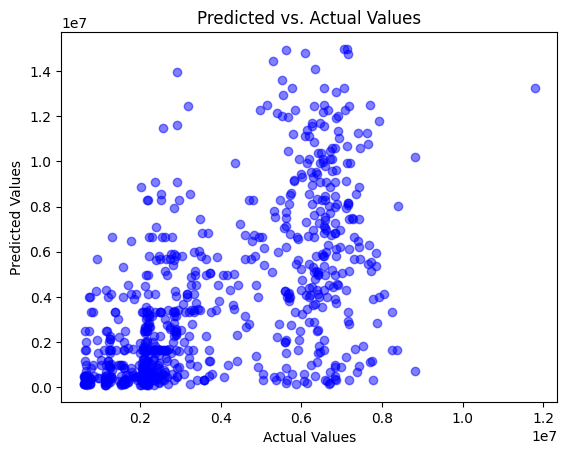

In [36]:
# Make some visualization to show the model fit
import matplotlib.pyplot as plt



# Scatter plot
plt.scatter(y_eval_lr, y_val, color='blue', alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [37]:
df = pd.DataFrame(data={"Actual Values": y_val, "Predictions": y_eval_lr})
pd.options.display.float_format = '{:.2f}'.format
df.head()


,Actual Values,Predictions
2714,13260000.00,5771177.58
2349,150000.00,693084.52
3091,4309500.00,5984840.10
1988,2657000.00,2752791.09
1213,3000000.00,2144640.45


In [38]:
# Decision tree

dt=DecisionTreeRegressor()
dt.fit(X_Train, y_Train) # Train the model on the training data
 # Evaluate the model on the validation set
y_eval_dt = dt.predict(X_val)


In [39]:
# R-squared
dt_r2 = r2_score(y_val, y_eval_dt)

# Mean Squared Error
dt_mse = mean_squared_error(y_val, y_eval_dt)

# Mean Absolute Error
dt_mae = mean_absolute_error(y_val, y_eval_dt)

print("R-squared:", dt_r2)
print("Mean Squared Error:", dt_mse)
print("Mean Absolute Error:", dt_mae)


R-squared: -0.012749813523229347
Mean Squared Error: 13135341399768.44
Mean Absolute Error: 2446693.254971468


In [40]:
df = pd.DataFrame(data={"Actual Values": y_val, "Predictions": y_eval_dt})
pd.options.display.float_format = '{:.2f}'.format
df.head()

,Actual Values,Predictions
2714,13260000.00,4704313.25
2349,150000.00,739756.64
3091,4309500.00,7627140.50
1988,2657000.00,1005000.00
1213,3000000.00,1160250.00


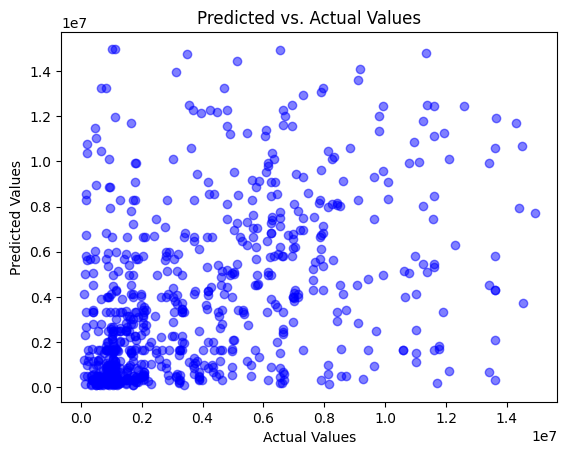

In [41]:
# Make some visualization to show the model fit
import matplotlib.pyplot as plt



# Scatter plot
plt.scatter(y_eval_dt, y_val, color='blue', alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [42]:
# Let me try ridge regression
rr=Ridge()
rr.fit(X_Train, y_Train) # Train the model on the training data
 # Evaluate the model on the validation set
y_eval_rr = rr.predict(X_val)



In [43]:
# R-squared
rr_r2 = r2_score(y_val, y_eval_rr)

# Mean Squared Error
rr_mse = mean_squared_error(y_val, y_eval_rr)

# Mean Absolute Error
rr_mae = mean_absolute_error(y_val, y_eval_rr)

print("R-squared:", rr_r2)
print("Mean Squared Error:", rr_mse)
print("Mean Absolute Error:", rr_mae)


R-squared: 0.37159116550026294
Mean Squared Error: 8150447889068.212
Mean Absolute Error: 2139766.6526730945


In [44]:
# random fores regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_Train, y_Train) # Train the model on the training data
 # Evaluate the model on the validation set
y_eval_rf = rf.predict(X_val)

In [45]:
# R-squared
rf_r2 = r2_score(y_val, y_eval_rf)

# Mean Squared Error
rf_mse = mean_squared_error(y_val, y_eval_rf)

# Mean Absolute Error
rf_mae = mean_absolute_error(y_val, y_eval_rf)

print("R-squared:", rf_r2)
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)

R-squared: 0.30414214409483176
Mean Squared Error: 9025260119502.957
Mean Absolute Error: 2152864.3840203388


In [46]:
# KNeighbors regressor
knr=KNeighborsRegressor()
knr.fit(X_Train, y_Train) # Train the model on the training data
 # Evaluate the model on the validation set
y_eval_knr = knr.predict(X_val)

In [47]:
# R-squared
knr_r2 = r2_score(y_val, y_eval_knr)

# Mean Squared Error
knr_mse = mean_squared_error(y_val, y_eval_knr)

# Mean Absolute Error
knr_mae = mean_absolute_error(y_val, y_eval_knr)

print("R-squared:", knr_r2)
print("Mean Squared Error:", knr_mse)
print("Mean Absolute Error:", knr_mae)

R-squared: 0.28724897405820937
Mean Squared Error: 9244364139856.63
Mean Absolute Error: 2183831.1139456662


In [48]:
# Check how the models are all performing in a visual manner

models = ['LinearRegression','DecisionTreeeRegressor','Ridge','RandomForestRegressor','KNeighborsRegressor']
r2_values = [lr_r2, dt_r2, rr_r2, rf_r2,knr_r2]
mse_values = [lr_mse, dt_mse, rr_mse, rf_mse,knr_mse]
mae_values = [lr_mae, dt_mae, rr_mae, rf_mae, knr_mae]

# Print or visualize the comparison
for model, r2, mse, mae in zip(models, r2_values, mse_values, mae_values):
    print(f'Model: {model}')
    print(f'R-squared: {r2}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print('\n')


Model: LinearRegression
R-squared: 0.3716807032607544
Mean Squared Error: 8149286586408.344
Mean Absolute Error: 2133991.386951359


Model: DecisionTreeeRegressor
R-squared: -0.012749813523229347
Mean Squared Error: 13135341399768.44
Mean Absolute Error: 2446693.254971468


Model: Ridge
R-squared: 0.37159116550026294
Mean Squared Error: 8150447889068.212
Mean Absolute Error: 2139766.6526730945


Model: RandomForestRegressor
R-squared: 0.30414214409483176
Mean Squared Error: 9025260119502.957
Mean Absolute Error: 2152864.3840203388


Model: KNeighborsRegressor
R-squared: 0.28724897405820937
Mean Squared Error: 9244364139856.63
Mean Absolute Error: 2183831.1139456662




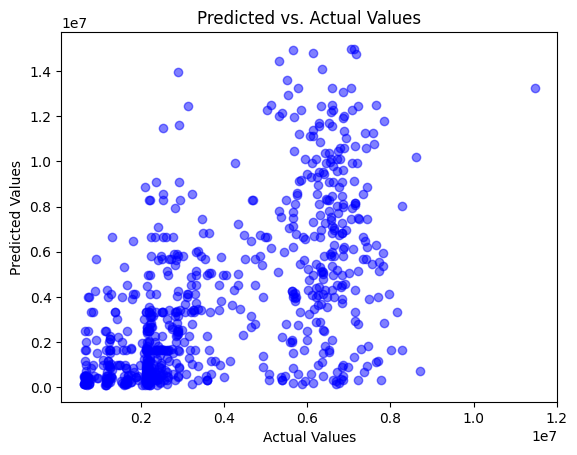

In [49]:
# I will use ridge
# Scatter plot
plt.scatter(y_eval_rr, y_val, color='blue', alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [50]:
df = pd.DataFrame(data={"Actual Values": y_val, "Predictions": y_eval_rr})
pd.options.display.float_format = '{:.2f}'.format
df.head()

,Actual Values,Predictions
2714,13260000.00,5782660.51
2349,150000.00,707906.96
3091,4309500.00,6019391.60
1988,2657000.00,2738380.81
1213,3000000.00,2064650.82


In [51]:
# Use the wrangle function to preprocess the test data
test_preprocessed = wrangle(test, target_column=None)

In [52]:
test_preprocessed.shape

(1601, 27)

In [53]:
# Get the predicted result for the test data

# Make predictions on the preprocessed test data
y_test_pred = rr.predict(test_preprocessed)

In [54]:
y_test_pred.shape

(1601,)

In [55]:
test.shape

(1601, 22)

In [56]:
# Create a DataFrame with test_id and predicted total_cost
result_df = pd.DataFrame({'test_id': test['ID'], 'total_cost': y_test_pred})


In [57]:






# Create a DataFrame with test_id and predicted total_cost
result_df = pd.DataFrame({'test_id': test['ID'], 'total_cost': y_test_pred})



In [58]:
result_df.head()

,test_id,total_cost
0,tour_1,6676800.82
1,tour_100,5566018.69
2,tour_1001,2801274.74
3,tour_1006,1758262.48
4,tour_1009,5915837.72


In [63]:
from google.colab import files
# Save the DataFrame to a CSV file
result_df.to_csv('second_submission.csv', index=False)

files.download('second_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>